In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# Load Data

cols = ['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']
fuel = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv', usecols=cols)

base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year'] # y: 'fuel_efficiency_mpg'

(array([4.300e+01, 2.460e+02, 9.880e+02, 2.259e+03, 2.913e+03, 2.165e+03,
        8.610e+02, 1.940e+02, 3.300e+01, 2.000e+00]),
 array([ 6.20097053,  8.17759568, 10.15422084, 12.13084599, 14.10747114,
        16.08409629, 18.06072144, 20.03734659, 22.01397175, 23.9905969 ,
        25.96722205]),
 <BarContainer object of 10 artists>)

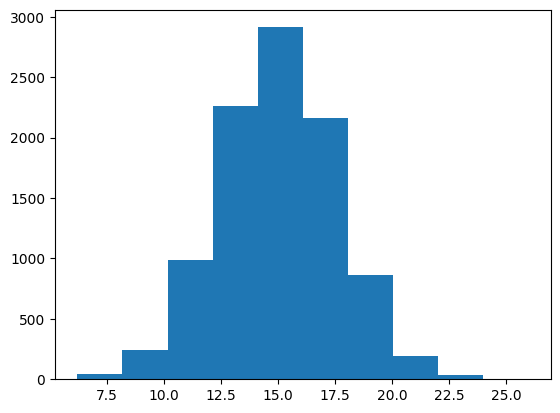

In [38]:
# EDA

plt.hist(fuel['fuel_efficiency_mpg'], bins=10)

In [39]:
# Question 1: Missing values

print("Missing values: ",fuel.columns[fuel.isna().any()].astype(str))

Missing values:  Index(['horsepower'], dtype='object')


In [40]:
# Question 2: Median

print(fuel['horsepower'].median())

149.0


In [41]:
# Data Preparation

n = len(fuel)

idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

fuel_train = fuel.iloc[idx[:n_train]]
fuel_val = fuel.iloc[idx[n_train:n_train+n_val]]
fuel_test = fuel.iloc[idx[n_train+n_val:]]

fuel_train = fuel_train.reset_index(drop=True)
fuel_val = fuel_val.reset_index(drop=True)
fuel_test = fuel_test.reset_index(drop=True)

y_train = fuel_train['fuel_efficiency_mpg'].values
y_val = fuel_val['fuel_efficiency_mpg'].values
y_test = fuel_test['fuel_efficiency_mpg'].values


In [42]:
# Common code for defining regression and RMSE functions

'''
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
'''

def train_linear_regression(X, y, r=0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [43]:
# Question 3-4: common validation set

X_val = prepare_X(fuel_val)

In [44]:
# Question 3 Option 1: fill with zero and perform regression
fuel_3a = fuel.copy()
fuel_train_3a = fuel_train.copy()

fuel_train_3a['horsepower'] = fuel_train_3a['horsepower'].fillna(0)

X_train_3a = prepare_X(fuel_train_3a)

w0_3a, w_3a = train_linear_regression(X_train_3a, y_train)

y_pred_3a = w0_3a + X_val.dot(w_3a)
round(rmse(y_val, y_pred_3a), 2)

np.float64(0.52)

In [45]:
# Question 3 Option 2: fill with mean and perform regression
fuel_3b = fuel.copy()
fuel_train_3b = fuel_train.copy()

fuel_train_3b['horsepower'] = fuel_train_3b['horsepower'].fillna(fuel_train_3b.horsepower.mean())

X_train_3b = prepare_X(fuel_train_3b)

w0_3b, w_3b = train_linear_regression(X_train_3b, y_train)

y_pred_3b = w0_3b + X_val.dot(w_3b)
round(rmse(y_val, y_pred_3b), 2)

# Using mean performs better

np.float64(0.61)

In [ ]:
# Question 4: (use 3a training set)

r = [0, 0.01, 0.1, 1, 5, 10, 100]


for ri in r:
    w0_4, w_4 = train_linear_regression(X_train_3a, y_train, r=ri)

    y_pred_4 = w0_4 + X_val.dot(w_4)
    print(f'r = {ri}, rmse = {round(rmse(y_val, y_pred_4), 2)}')

# Actually r=100 gives the best results:
'''
r = 0, rmse = 0.5173782638844466
r = 0.01, rmse = 0.5171115525769823
r = 0.1, rmse = 0.5187525130702517
r = 1, rmse = 0.5222348802093141
r = 5, rmse = 0.522891609282361
r = 10, rmse = 0.5229812979636599
r = 100, rmse = 0.5230636233819933
'''

r = 0, rmse = 0.52
r = 0.01, rmse = 0.52
r = 0.1, rmse = 0.52
r = 1, rmse = 0.52
r = 5, rmse = 0.52
r = 10, rmse = 0.52
r = 100, rmse = 0.52


'\nr = 0, rmse = 0.5173782638844466\nr = 0.01, rmse = 0.5171115525769823\nr = 0.1, rmse = 0.5187525130702517\nr = 1, rmse = 0.5222348802093141\nr = 5, rmse = 0.522891609282361\nr = 10, rmse = 0.5229812979636599\nr = 100, rmse = 0.5230636233819933\n'

In [ ]:
# Question 5

# Define the functions to retieve the indexing

def prepare(seed=42):

    n = len(fuel)

    idx = np.arange(n)

    np.random.seed(seed)
    np.random.shuffle(idx)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    fuel_train = fuel.iloc[idx[:n_train]]
    fuel_val = fuel.iloc[idx[n_train:n_train+n_val]]
    fuel_test = fuel.iloc[idx[n_train+n_val:]]

    fuel_train = fuel_train.reset_index(drop=True)
    fuel_val = fuel_val.reset_index(drop=True)
    fuel_test = fuel_test.reset_index(drop=True)

    y_train = fuel_train['fuel_efficiency_mpg'].values
    y_val = fuel_val['fuel_efficiency_mpg'].values
    y_test = fuel_test['fuel_efficiency_mpg'].values

    return fuel_train, fuel_val, fuel_test, y_train, y_val, y_test

seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

stds = []

for s in seeds:
    fuel_train, fuel_val, fuel_test, y_train, y_val, y_test = prepare(s)

    X_val = prepare_X(fuel_val)

    fuel_train['horsepower'] = fuel_train['horsepower'].fillna(0)

    X_train = prepare_X(fuel_train)

    w0, w = train_linear_regression(X_train, y_train)

    y_pred = w0 + X_val.dot(w)
    stds.append(rmse(y_val, y_pred))

print(f"stanard deviation: {round(np.std(stds),3)}")

# Answer 0.007

stanard deviation: 0.007


In [ ]:
# Question 6

fuel_train, fuel_val, fuel_test, y_train, y_val, y_test = prepare(9)

fuel_train['horsepower'] = fuel_train['horsepower'].fillna(0)

fuel_valtest = pd.concat([fuel_val, fuel_test], axis=0)
y_valtest = np.append(y_val,y_test)

X_valtest = prepare_X(fuel_valtest)

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_valtest.dot(w)

rmse(y_valtest, y_pred)

# Answer: 0.515

np.float64(0.5145092074891398)